## Libraries

In [78]:
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import scipy.sparse as sp

## Data Preparation

#### Load the training and test sentiment datasets "test.tsv" and "train.tsv"

In [3]:
X_text_train = []
y_train = []

with open('train.tsv') as file:
    tsv_reader = csv.reader(file, delimiter = '\t', quoting = csv.QUOTE_NONE)
    
    for row in tsv_reader:
        X_text_train.append(row[1]) #text being processed
        y_train.append(row[2]) #label
        
X_text_test = []
y_test = []

with open('test.tsv') as file:
    tsv_reader = csv.reader(file, delimiter = '\t', quoting = csv.QUOTE_NONE)
    
    for row in tsv_reader:
        X_text_test.append(row[1]) #text being processed
        y_test.append(row[2]) #label

#### Visualize Training Data

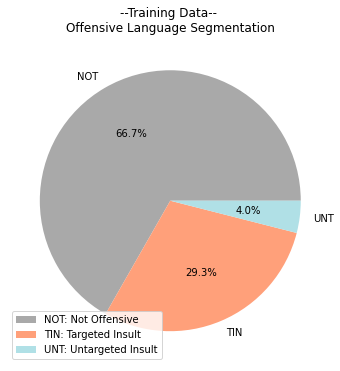

In [4]:
with open('train.tsv') as file:
    train_file = csv.reader(file, delimiter = '\t', quoting = csv.QUOTE_NONE)
    train_df = pd.DataFrame(train_file)

color_theme = ['darkgray', 'lightsalmon', 'powderblue']
labels = ['NOT: Not Offensive', 'TIN: Targeted Insult', 'UNT: Untargeted Insult']
    
train_df[2].value_counts().plot.pie(figsize = (6,6), title = '--Training Data-- \nOffensive Language Segmentation', ylabel = '', colors = color_theme, autopct='%1.1f%%')
plt.legend(labels, loc = 3)

#### Convert X_text_train and X_text_test to matricies of numbers 

In [5]:
np.random.seed(42)
random.seed(42)

vec = CountVectorizer(ngram_range = (1,1))

X_train = vec.fit_transform(X_text_train) 
X_test = vec.transform(X_text_test) 

<br>

## (1) LinearSVC Classifier

#### Initialize the classifier LinearSVC, Create the params with the C values

In [6]:
svc = LinearSVC()

params = {"C": [0.0001, 0.001, 0.01, 0.1, 1., 10., 100.]}

#### Initialize GridSearchCV and Fit the Model

In [7]:
clf = GridSearchCV(svc, params, cv = 10, scoring = 'f1_micro')
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='f1_micro')

#### Get the score from the GridSearchCV "best score" and Best Parameters

In [8]:
validation_score = clf.best_score_ 
print("Validation: {:.4f}".format(validation_score))

best_parameters = clf.best_params_
print(f"Best Params: {best_parameters}")

Validation: 0.7340
Best Params: {'C': 0.1}


#### "predict" on X_test 

In [9]:
svm_test_predictions = clf.predict(X_test) 

#### Scoring

In [10]:
f1_micro = f1_score(y_test, svm_test_predictions, average = 'micro')
f1_macro = f1_score(y_test, svm_test_predictions, average = 'macro')

test_score = clf.score(X_test, y_test)

print("**Scoring**\n")
print("Test Accuracy: {:.4f}\n".format(test_score))
print("F1 Micro: {:.4f}".format(f1_micro))
print("F1 Macro: {:.4f}".format(f1_macro))

**Scoring**

Test Accuracy: 0.7753

F1 Micro: 0.7753
F1 Macro: 0.2911


#### Store predictions and write to a new CSV

In [11]:
# Store predictions
svm_test_predictions_df = pd.DataFrame(data = svm_test_predictions)

# Write to a csv
with open('test.tsv') as file:
    test_file = csv.reader(file, delimiter = '\t', quoting = csv.QUOTE_NONE)
    svc_test_df = pd.DataFrame(test_file)
    
svc_test_df[2] = svm_test_predictions_df[0]
svc_test_df.columns = ['TWITTER_ID', 'TEXT', 'PREDICTIONS']
svc_test_df.to_csv('00. LinearSVC Prediction Results.csv', index = False)

#### Visualize LinearSVC Prediction Results

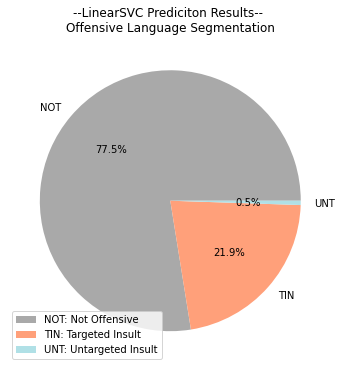

In [12]:
color_theme = ['darkgray', 'lightsalmon', 'powderblue']
labels = ['NOT: Not Offensive', 'TIN: Targeted Insult', 'UNT: Untargeted Insult']
    
svc_test_df['PREDICTIONS'].value_counts().plot.pie(figsize = (6,6), title = '--LinearSVC Prediciton Results-- \nOffensive Language Segmentation', ylabel = '', colors = color_theme, autopct='%1.1f%%')
plt.legend(labels, loc = 3)

<br>

## (2) RandomForestClassifier

#### Build Parameter Grid

In [13]:
n_estimators = [10, 30, 50, 70, 90, 100]

parameters = {'n_estimators': n_estimators}

#### Initialize the RandomForest classifier

In [14]:
rand_forest = RandomForestClassifier()

#### Initialize GridSearchCV and Fit the Model

In [15]:
clf_rand = GridSearchCV(rand_forest, parameters, cv = 10, verbose = 2)
clf_rand.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   1.8s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   1.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.7s
[CV] n_estimators=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 10.7min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 30, 50, 70, 90, 100]}, verbose=2)

#### Get the score from the GridSearchCV "best score" and Best Parameters

In [16]:
validation_score = clf_rand.best_score_ 
print("Validation: {:.4f}".format(validation_score))

best_parameters = clf_rand.best_params_
print(f"Best Params: {best_parameters}")

Validation: 0.7388
Best Params: {'n_estimators': 90}


#### "predict" on X_test 

In [17]:
rand_test_predictions = clf_rand.predict(X_test) 

#### Scoring

In [18]:
f1_micro_rand = f1_score(y_test, rand_test_predictions, average = 'micro')
f1_macro_rand = f1_score(y_test, rand_test_predictions, average = 'macro')

rand_test_score = clf_rand.score(X_test, y_test)

print("**Scoring**\n")
print("Test Accuracy: {:.4f}\n".format(rand_test_score))
print("F1 Micro: {:.4f}".format(f1_micro_rand))
print("F1 Macro: {:.4f}".format(f1_macro_rand))

**Scoring**

Test Accuracy: 0.8667

F1 Micro: 0.8667
F1 Macro: 0.3095


#### Store predictions and write to CSV

In [19]:
# Store predictions
rand_test_predictions_df = pd.DataFrame(data = rand_test_predictions)

# Write to a csv
with open('test.tsv') as file:
    test_file = csv.reader(file, delimiter = '\t', quoting = csv.QUOTE_NONE)
    rf_test_df = pd.DataFrame(test_file)
    
rf_test_df[2] = rand_test_predictions_df[0]
rf_test_df.columns = ['TWITTER_ID', 'TEXT', 'PREDICTIONS']
rf_test_df.to_csv('00. RandomForest Prediction Results.csv', index = False)

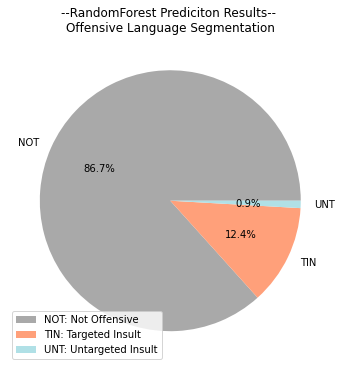

In [20]:
color_theme = ['darkgray', 'lightsalmon', 'powderblue']
labels = ['NOT: Not Offensive', 'TIN: Targeted Insult', 'UNT: Untargeted Insult']
    
rf_test_df['PREDICTIONS'].value_counts().plot.pie(figsize = (6,6), title = '--RandomForest Prediciton Results-- \nOffensive Language Segmentation', ylabel = '', colors = color_theme, autopct='%1.1f%%')
plt.legend(labels, loc = 3)

<br>

## (3) RandomForestClassifier + Lexicon

#### Build Negative Word Lexicon Function

In [21]:
class LexiconClassifier():
    def __init__(self):

        self.negative_words = set()
        with open('negative-words.txt', encoding='iso-8859-1') as iFile:
            for row in iFile:
                self.negative_words.add(row.strip())

    def count_neg_words(self, sentence):
        num_neg_words = 0
        for word in sentence.lower().split():
            if word in self.negative_words:
                num_neg_words += 1
        return num_neg_words

#### Load Features

In [22]:
lex_class = LexiconClassifier()

X_train_lexicon_features = []
X_test_lexicon_features = [] 

for string in X_text_test:
    X_test_lexicon_features.append([lex_class.count_neg_words(string)])

for string in X_text_train:
    X_train_lexicon_features.append([lex_class.count_neg_words(string)])

#### Combine RandomForestClassifier with LexiconClassifier

In [23]:
vec = CountVectorizer(ngram_range = (1,1))

X_train_w_lex = vec.fit_transform(X_text_train) 
X_test_w_lex = vec.transform(X_text_test)

X_train_lexicon_features = np.array(X_train_lexicon_features)
X_test_lexicon_features = np.array(X_test_lexicon_features)

X_train_w_lex = sp.hstack((X_train_lexicon_features, X_train_w_lex))
X_test_w_lex = sp.hstack((X_test_lexicon_features, X_test_w_lex))

#### Build Parameter Grid

In [24]:
n_estimators = [10, 30, 50, 70, 90, 100]

parameters = {'n_estimators': n_estimators}

#### Initialize the RandomForest classifier

In [25]:
rand_forest_lex = RandomForestClassifier()

#### Initialize GridSearchCV and Fit the Model on X_train_w_lex

In [26]:
clf_rand_lex = GridSearchCV(rand_forest_lex, parameters, cv = 10, verbose = 2)

clf_rand_lex.fit(X_train_w_lex, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   1.6s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   1.6s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.6s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.6s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.6s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.6s
[CV] n_estimators=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.5min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 30, 50, 70, 90, 100]}, verbose=2)

#### Get the score from the GridSearchCV "best score" and Best Parameters

In [27]:
validation_score = clf_rand_lex.best_score_ 
print("Validation: {:.4f}".format(validation_score))

best_parameters = clf_rand_lex.best_params_
print(f"Best Params: {best_parameters}")

Validation: 0.7342
Best Params: {'n_estimators': 70}


#### "predict on X_test_w_lex"

In [28]:
rand_test_predictions_lex = clf_rand_lex.predict(X_test_w_lex) 

#### Scoring

In [29]:
f1_micro_rand_lex = f1_score(y_test, rand_test_predictions_lex, average = 'micro')
f1_macro_rand_lex = f1_score(y_test, rand_test_predictions_lex, average = 'macro')

print("F1 Micro: {:.4f}".format(f1_micro_rand_lex))
print("F1 Macro: {:.4f}".format(f1_macro_rand_lex))

F1 Micro: 0.8758
F1 Macro: 0.3113


#### Store predictions and write to CSV

In [30]:
# Store predictions
rand_test_predictions_lex_df = pd.DataFrame(data = rand_test_predictions_lex)

# Write to a csv
with open('test.tsv') as file:
    test_file = csv.reader(file, delimiter = '\t', quoting = csv.QUOTE_NONE)
    rf_test_lex_df = pd.DataFrame(test_file)
    
rf_test_lex_df[2] = rand_test_predictions_lex_df[0]
rf_test_lex_df.columns = ['TWITTER_ID', 'TEXT', 'PREDICTIONS']
rf_test_lex_df.to_csv('00. RandomForest + Lexicon Prediction Results.csv', index = False)

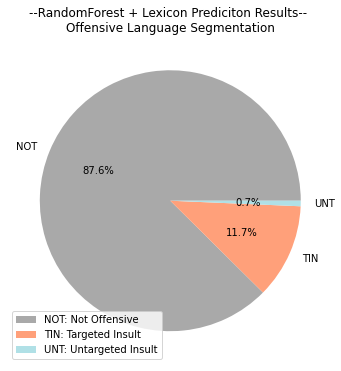

In [31]:
color_theme = ['darkgray', 'lightsalmon', 'powderblue']
labels = ['NOT: Not Offensive', 'TIN: Targeted Insult', 'UNT: Untargeted Insult']
    
rf_test_lex_df['PREDICTIONS'].value_counts().plot.pie(figsize = (6,6), title = '--RandomForest + Lexicon Prediciton Results-- \nOffensive Language Segmentation', ylabel = '', colors = color_theme, autopct='%1.1f%%')
plt.legend(labels, loc = 3)

<br>

## Bag Words

In [76]:
rand_lex_df = pd.read_csv("00. RandomForest + Lexicon Prediction Results.csv") 
neg_df = rand_lex_df.loc[rand_lex_df['PREDICTIONS'] != 'NOT']
neg_df = neg_df["TEXT"]
neg_df = neg_df.reset_index(drop=True)
neg_df = pd.DataFrame(neg_df)
neg_df

,TEXT
0,@USER @USER @USER Fk River you are a sick indi...
1,@USER Unfirtunately i have seen hispanics just...
2,@USER @USER @USER The bigger problem is libera...
3,@USER Shocking almost all liberals are crazy a...
4,@USER @USER She thinks she can run for Preside...
...,...
324,@USER Google CFO is a joke! And so is the idio...
325,@USER @USER #MohammadHassanKhalid is a #traito...
326,@USER @USER oh shit you weren't joking... wtf
327,@USER @USER Everything else was ten years ago....


<br>